# CNN 시각화

- 필터 가중치 시각화
- 특성 맵 시각화

In [23]:
# 라이브러리 설정
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import random

# 랜덤 시드 고정
SEED=12
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)  

## 예제. Fashion MNist 데이터

In [24]:
from keras import Sequential
from keras.models import Model 
from keras.layers import Input,Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.datasets import fashion_mnist
from sklearn.model_selection import train_test_split
from keras.utils import plot_model

#### 데이터 준비

In [25]:
(train_input, train_target), (test_input, test_target) = fashion_mnist.load_data()

In [26]:
train_input.shape

(60000, 28, 28)

In [27]:
# 데이터 전처리 : 데이터차원 확장(3D -> 4D) + 데이터 정규화(min_max scaling)
train_scaled = train_input.reshape(-1, 28, 28,  1) / 255.0
test_scaled = test_input.reshape(-1, 28, 28, 1)/255

train_X, val_X, train_y, val_y = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

In [28]:
def draw_loss_val_plot(history):
    acc = ['accuracy', 'val_accuracy']
    loss = ['loss', 'val_loss']
    title = ['Loss', 'Accuracy']

    plt.figure(figsize=(10,5))
    for i, item in enumerate([loss, acc]):
        plt.subplot(1, 2, i+1)
        n = len(history.history[item[0]])
        plt.plot(range(1, n+1), history.history[item[0]], label=item[0])
        plt.plot(range(1, n+1), history.history[item[1]], label=item[1])
        plt.xlabel('epoch')
        plt.ylabel(title[i])
        plt.title(f'{title[i]} plot')
        plt.legend()
    plt.show()

In [29]:
def build_cnn_model():
    inputs = Input(shape=(28,28,1))
    x = Conv2D(filters=32, kernel_size=3, activation='relu', padding='same', name='conv1')(inputs)
    x = MaxPooling2D(2)(x)
    x = Conv2D(filters=64, kernel_size=3, activation='relu', padding='same', name='conv2')(x)
    x = MaxPooling2D(2)(x)
    x = Flatten()(x)
    x = Dense(100, activation='relu')(x)
    x = Dropout(0.4)(x)
    outputs = Dense(10, activation='softmax')(x)
    model = Model(inputs, outputs, name='fmnist_cnn')

    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

In [30]:
model = build_cnn_model()
model_path = 'model/fmnist_best_cnn.keras'
callbacks = [ModelCheckpoint(model_path, save_best_only=True),
             EarlyStopping(patience=4, restore_best_weights=True)]
history = model.fit(train_X, train_y, epochs=30, validation_data=(val_X, val_y),
                    callbacks=callbacks)

Epoch 1/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8045 - loss: 0.5424 - val_accuracy: 0.8723 - val_loss: 0.3419
Epoch 2/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.8725 - loss: 0.3570 - val_accuracy: 0.8844 - val_loss: 0.3037
Epoch 3/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8904 - loss: 0.3081 - val_accuracy: 0.8991 - val_loss: 0.2687
Epoch 4/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9024 - loss: 0.2749 - val_accuracy: 0.9020 - val_loss: 0.2595
Epoch 5/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9094 - loss: 0.2485 - val_accuracy: 0.9102 - val_loss: 0.2557
Epoch 6/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9170 - loss: 0.2266 - val_accuracy: 0.9118 - val_loss: 0.2464
Epoch 7/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9235 - loss: 0.2099 - val_accuracy: 0.9095 - val_loss: 0.2600
Epoch 8/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9304 - loss: 0.1917 -

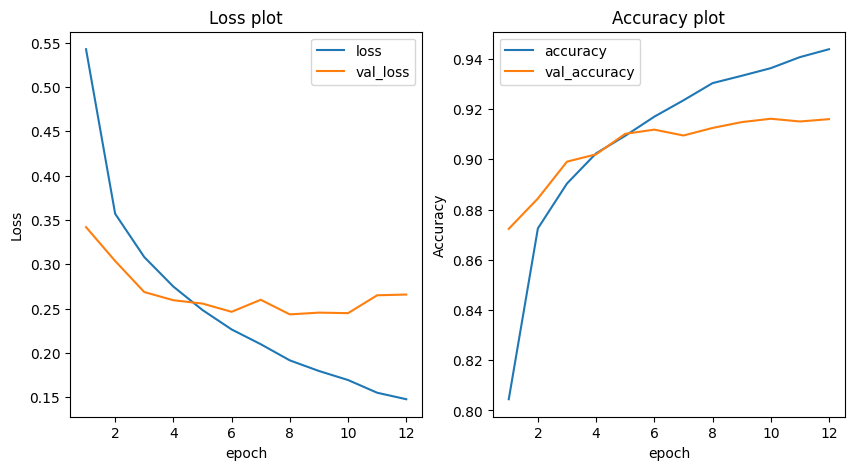

In [31]:
draw_loss_val_plot(history)

In [32]:
import keras

In [33]:
best_model = keras.models.load_model(model_path)
test_loss, test_acc = best_model.evaluate(test_scaled, test_target)
print(f'test data loss : {test_loss:.4f}, accuracy : {test_acc:.4f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9068 - loss: 0.2649
test data loss : 0.2649, accuracy : 0.9068


### 모델 정의

#### 손실 검증

In [34]:
best_model.summary()

Model: "fmnist_cnn"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1 (Conv2D)                       │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2 (Conv2D)                       │ (None, 14, 14, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 3136)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 100)                 │         313,700 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,000,580 (3.82 MB)

 Trainable params: 333,526 (1.27 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 667,054 (2.54 MB)

In [35]:
best_model.layers

[<InputLayer name=input_layer, built=True>,
 <Conv2D name=conv1, built=True>,
 <MaxPooling2D name=max_pooling2d, built=True>,
 <Conv2D name=conv2, built=True>,
 <MaxPooling2D name=max_pooling2d_1, built=True>,
 <Flatten name=flatten, built=True>,
 <Dense name=dense, built=True>,
 <Dropout name=dropout, built=True>,
 <Dense name=dense_1, built=True>]

In [36]:
conv1 = best_model.layers[1]
len(conv1.weights)

2

In [37]:
print(f'첫번째 합성곱층의 가중치: {conv1.weights[0].shape}')
print(f'첫번째 합성곱층의 절편: {conv1.weights[1].shape}')

첫번째 합성곱층의 가중치: (3, 3, 1, 32)
첫번째 합성곱층의 절편: (32,)


In [38]:
type(conv1.weights[0])

keras.src.backend.Variable

In [39]:
conv1_weights = conv1.weights[0].numpy()
print(conv1_weights.shape)
print(f'conv1 weights mean: {conv1_weights.mean()}, std:{conv1_weights.std()}')

(3, 3, 1, 32)
conv1 weights mean: -0.024615921080112457, std:0.2494918555021286


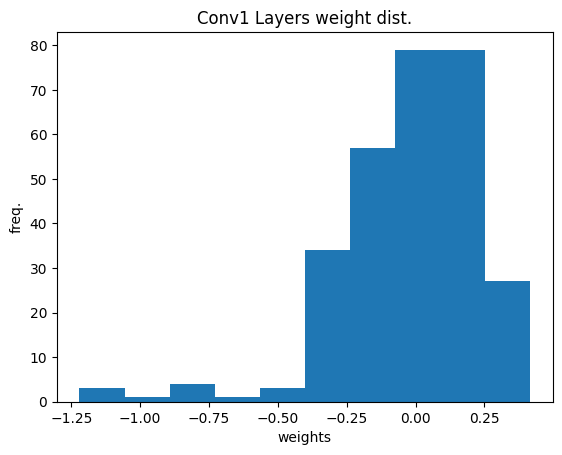

In [40]:
plt.hist(conv1_weights.reshape(-1,1))
plt.xlabel('weights')
plt.ylabel('freq.')
plt.title('Conv1 Layers weight dist.')
plt.show()

In [41]:
num_filters = conv1_weights.shape[-1]
conv1_weights[:,:,:,0]

array([[[-0.22268471],
        [ 0.27629018],
        [-0.06653401]],

       [[ 0.20791161],
        [ 0.21850784],
        [-0.36511812]],

       [[ 0.03852686],
        [-0.01543396],
        [-0.10286036]]], dtype=float32)

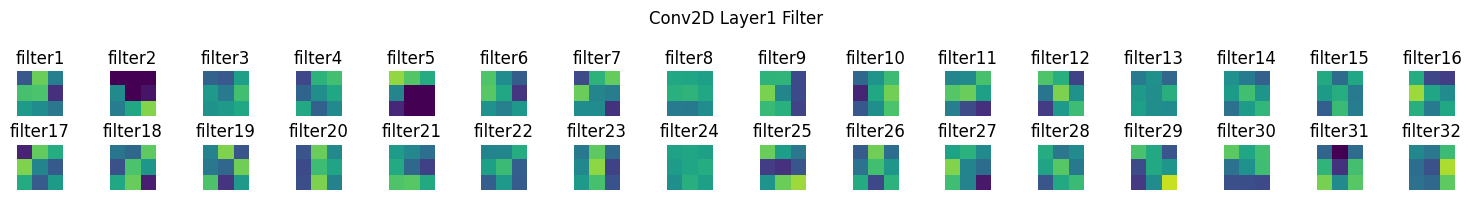

In [42]:
cols = int(num_filters/2)
plt.figure(figsize=(15,2))
for i in range(num_filters):
    plt.subplot(2, cols, i+1)
    plt.imshow(conv1_weights[:,:,:,i], vmin=-0.5, vmax=0.5)
    plt.axis('off')
    plt.title(f'filter{i+1}')
plt.suptitle('Conv2D Layer1 Filter')
plt.tight_layout()
plt.show()

In [43]:
empty_model = build_cnn_model()
no_conv1 = empty_model.layers[1]
no_conv1.weights[0].shape

TensorShape([3, 3, 1, 32])

학습하지 않은 conv1 weights mean: -0.003897313494235277, std:0.08229


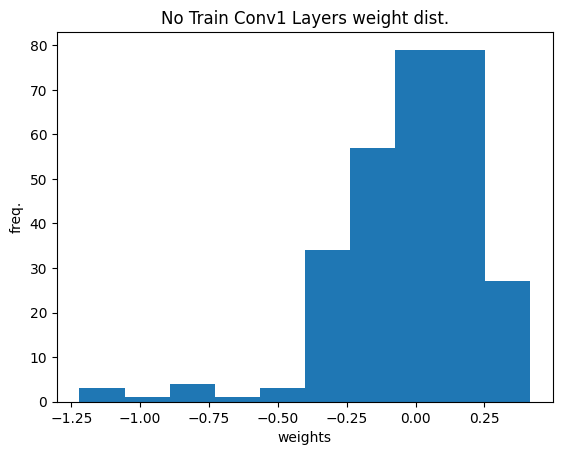

In [44]:
no_conv1_weights = no_conv1.weights[0].numpy()
print(f'학습하지 않은 conv1 weights mean: {no_conv1_weights.mean()}, std:{no_conv1_weights.std():.5f}')
plt.hist(conv1_weights.reshape(-1,1))
plt.xlabel('weights')
plt.ylabel('freq.')
plt.title('No Train Conv1 Layers weight dist.')
plt.show()

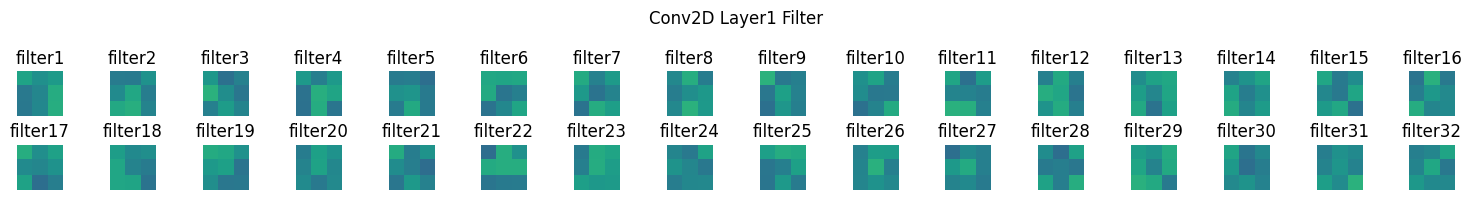

In [45]:
cols = int(num_filters/2.)
plt.figure(figsize=(15,2))
for i in range(num_filters):
    plt.subplot(2, cols, i+1)
    plt.imshow(no_conv1_weights[:,:,:,i], vmin=-0.5, vmax=0.5)
    plt.axis('off')
    plt.title(f'filter{i+1}')
plt.suptitle('Conv2D Layer1 Filter')
plt.tight_layout()
plt.show()

# CNN 시각화

- 필터 가중치 시각화
- 특성 맵 시각화

### 필터 가중치 시각화

In [46]:
conv2 = best_model.layers[3]
print(f'두번째 합성곱층의 가중치: {conv2.weights[0].shape}')
print(f'두번째 합성곱층의 절편: {conv2.weights[1].shape}')

두번째 합성곱층의 가중치: (3, 3, 32, 64)
두번째 합성곱층의 절편: (64,)


In [47]:
num_filters = conv2.weights[0].shape[-1]
num_filters

64

In [48]:
conv2_weights = conv2.weights[0].numpy()
conv2_weights[:,:,0,0]

array([[-0.20054299, -0.18194644, -0.05770152],
       [ 0.04316338,  0.00435448, -0.01405724],
       [-0.18190855, -0.03362008, -0.0643761 ]], dtype=float32)

- 입력 채널별 출력 필터 가중치 시각화 : (3, 3, input_channel, output)

#### 첫번째 합성곱 층의 가중치 시각화

In [49]:
# i번째 입력채널 기준으로 필터 시각화
def visualize_filter_output_channel(input_channel=0):
    plt.figure(figsize=(15,4))
    for i in range(num_filters):
        plt.subplot(4, 16, i+1)
        plt.imshow(conv2_weights[:,:,input_channel,i], vmin=-0.5, vmax=0.5)
        plt.axis('off')
        plt.title(f'{i+1}', fontsize=8)
    plt.suptitle('Conv2D Layer2 Filters (input channel : {input_channel})', fontsize=1)
    plt.tight_layout()
    plt.show()

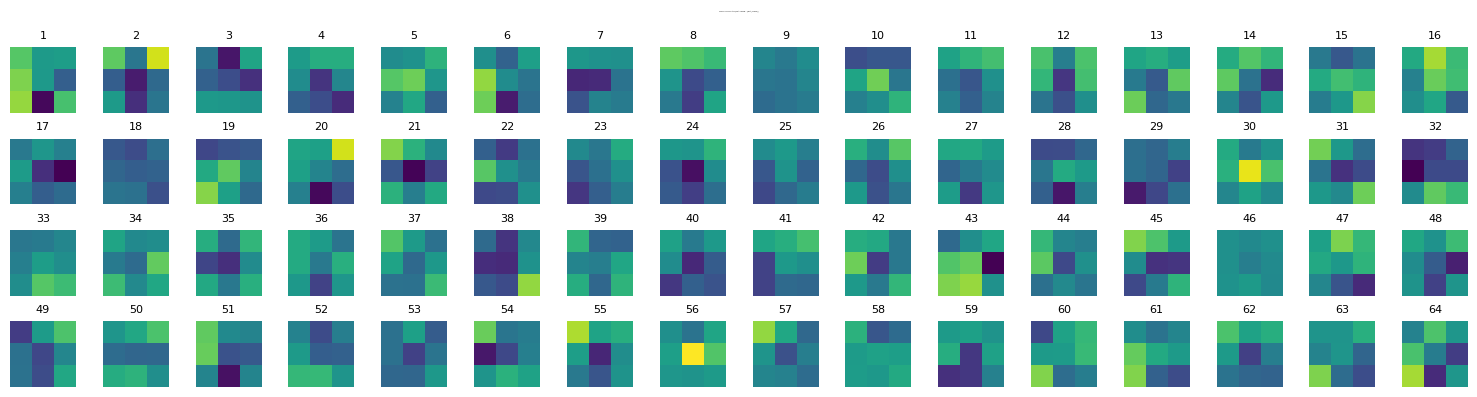

In [50]:
visualize_filter_output_channel(input_channel=1)

#### 출력 채널별 입력 필터 가중치 시각화 : (3, 3, input_channel, filters)

In [51]:
def visualize_filter_input_channel(filter_idx=0, in_channel=32):
    plt.figure(figsize=(15,3))
    for i in range(in_channel):
        plt.subplot(4, 16, i+1)
        plt.imshow(conv2_weights[:,:,i,filter_idx], vmin=-0.5, vmax=0.5)
        plt.axis('off')
        plt.title(f'{i+1}', fontsize=8)
    plt.suptitle(f'Conv2D Layer2 Filters : {filter_idx}) (Input Channels)', fontsize=14)
    plt.tight_layout()
    plt.show()

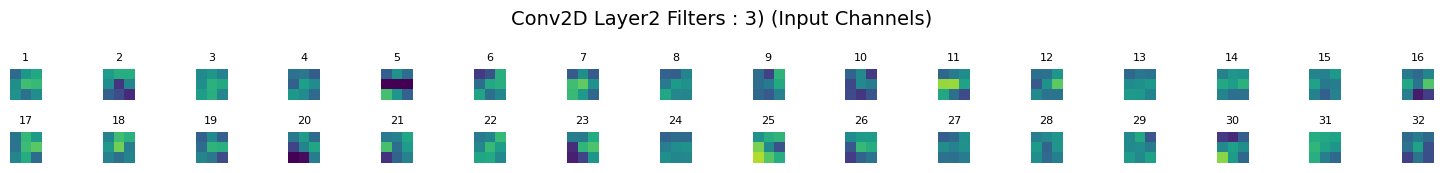

In [52]:
visualize_filter_input_channel(filter_idx=3, in_channel=32)

입력 채널별 출력 필터의 가중치 시각화
- 입력 채널이 출력 필터들에 어떤 영향을 주는지 분석
- 입력 채널에 대한 관심도 차이 파악 -> 출력 필터가 입력채널을 얼마나 활용하는가?
- 출력 필터들의 다양성 또는 중복성 탐지                      
      - 다양한 필터가 서로 다른 방향성/위치를 학습한 경우 좋은 일반화 성능을 가질 수 있음

### 신경망 모델 구성을 위한 함수형 API

In [106]:
best_model.input

<KerasTensor shape=(None, 28, 28, 1), dtype=float32, sparse=False, ragged=False, name=input_layer>

In [107]:
best_model.layers[1].output

<KerasTensor shape=(None, 28, 28, 32), dtype=float32, sparse=False, ragged=False, name=keras_tensor_10>

In [108]:
conv_activ1 = Model(inputs=best_model.input , outputs=best_model.layers[1].output)

### 특성맵 시각화

- 첫번째 샘플을 conv_acti_1의 predict() 메서드에 전달하여 특성맵을 확인

In [109]:
train_scaled[0].shape

(28, 28, 1)

In [110]:
train_target[0]

np.uint8(9)

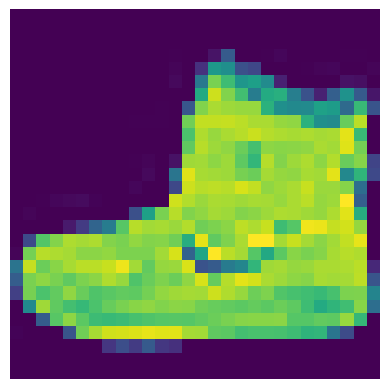

In [111]:
plt.imshow(train_scaled[0])
plt.axis('off')
plt.show()

In [112]:
sample = train_scaled[0].reshape(-1,28,28,1)
ftrmap  = conv_activ1.predict(sample)
ftrmap.shape

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


(1, 28, 28, 32)

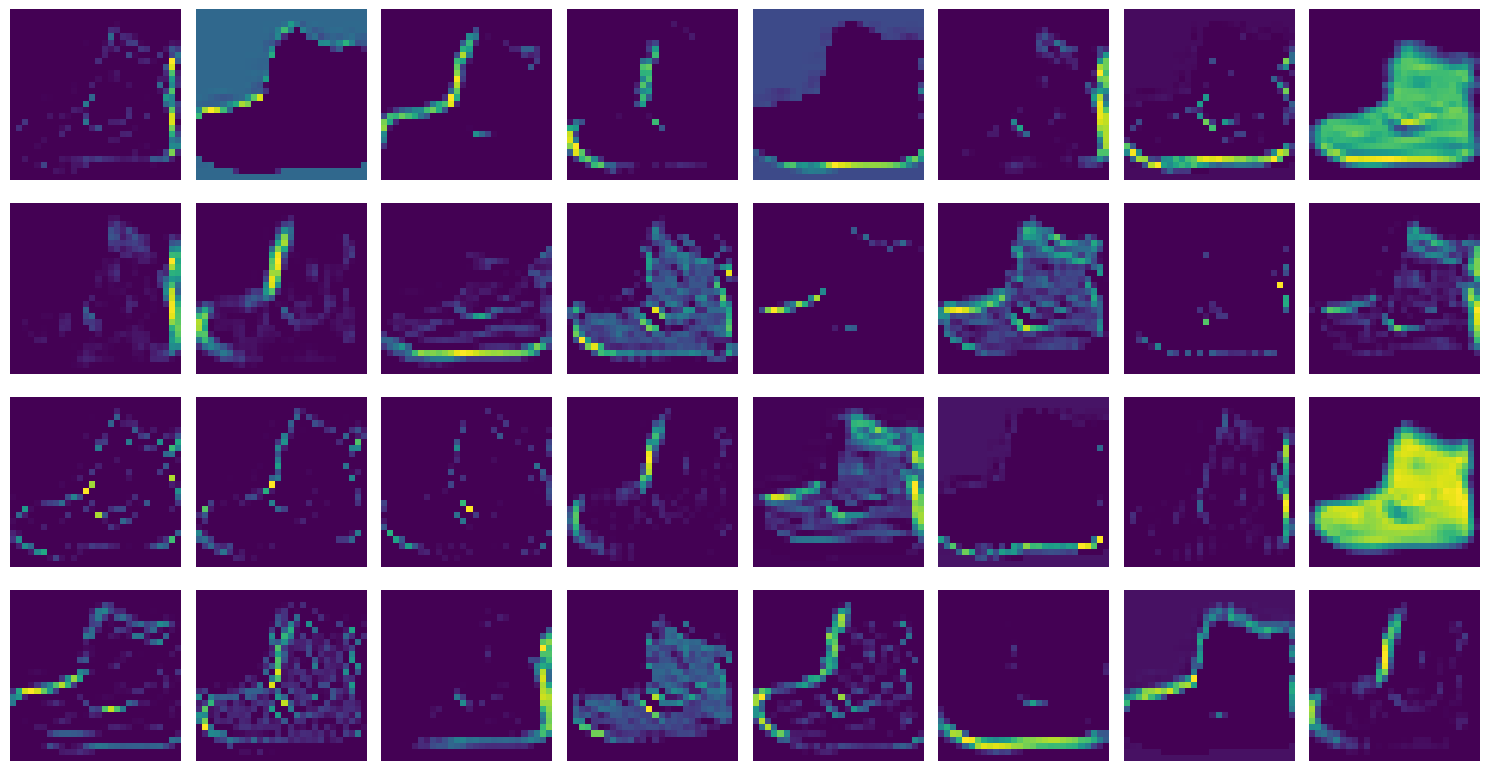

In [113]:
plt.figure(figsize=(15,8))
for i in range(32):
    plt.subplot(4, 8, i+1)
    plt.imshow(ftrmap[0,:,:,i])
    plt.axis('off')
plt.tight_layout()
plt.show()

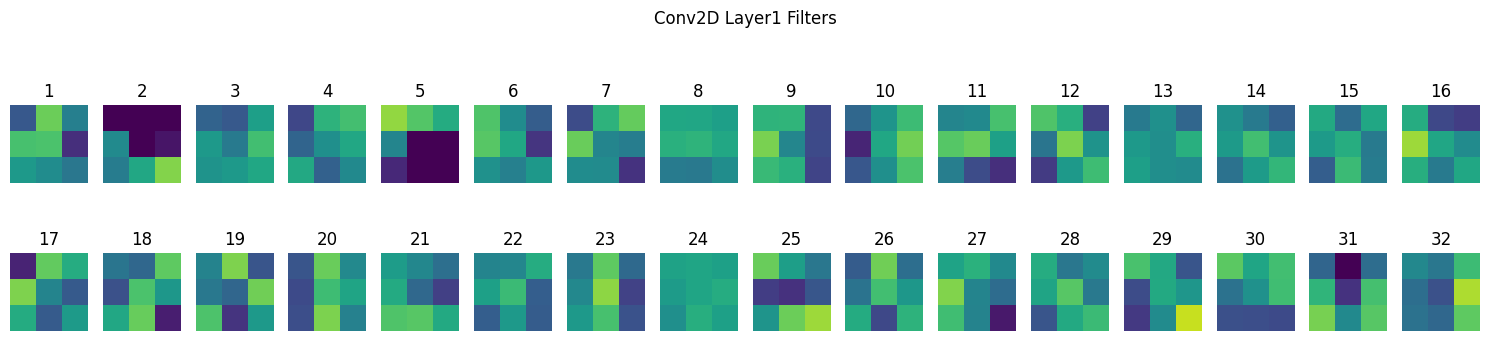

In [114]:
num_filters=32
plt.figure(figsize=(15,4))
for i in range(num_filters):
    f = conv1_weights[:,:,0,i]
    plt.subplot(2, 16, i+1)
    plt.imshow(f, vmin=-0.5, vmax=0.5)
    plt.axis('off')
    plt.title(f'{i+1}')
plt.suptitle('Conv2D Layer1 Filters')
plt.tight_layout()
plt.show()

- 첫번째 샘플을 conv_activ2의 predict 메서드에 전달하여 특성맵을 확인

In [115]:
sample = train_scaled[0].reshape(-1,28,28,1)
conv_activ2 = Model(inputs=best_model.inputs, outputs=best_model.layers[3].output)
ftrmap2  = conv_activ2.predict(sample)
ftrmap2.shape

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


(1, 14, 14, 64)

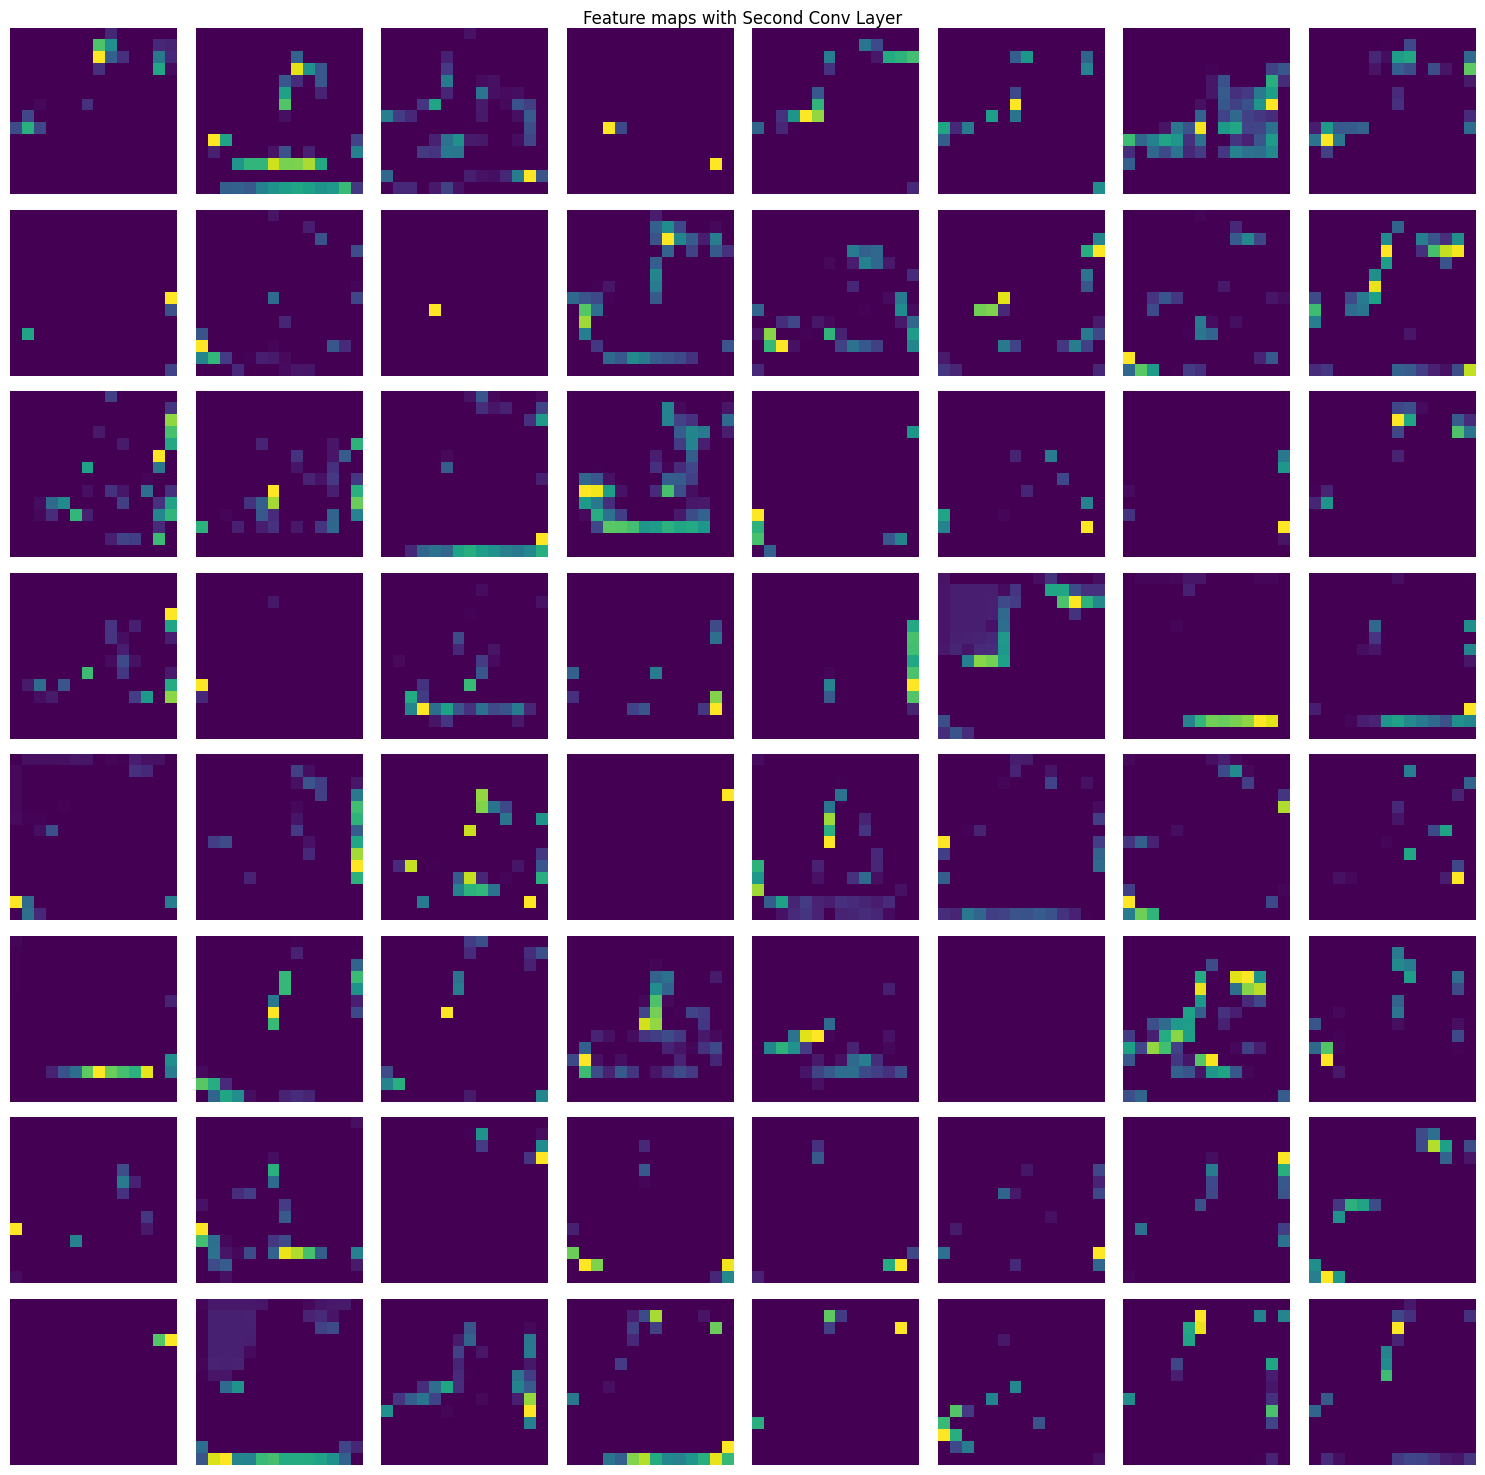

In [116]:
plt.figure(figsize=(15,15))
for i in range(64):
    plt.subplot(8, 8, i+1)
    plt.imshow(ftrmap2[0,:,:,i])
    plt.axis('off')
plt.suptitle('Feature maps with Second Conv Layer')
plt.tight_layout()
plt.show()

#### 참고. 두 개의 Conv층에 대한 특성맵(Feature Map) 시각화

In [117]:
# 중간 출력 모델 생성(Conv2D층 두 개의 출력)
conv_layer_outputs = [layer.output for layer in best_model.layers if isinstance(layer, keras.layers.Conv2D)]
activ_model = keras.models.Model(inputs=best_model.inputs, outputs=conv_layer_outputs)
activ_model.summary()

Model: "functional_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1 (Conv2D)                       │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2 (Conv2D)                       │ (None, 14, 14, 64)          │          18,496 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 18,816 (73.50 KB)

 Trainable params: 18,816 (73.50 KB)

 Non-trainable params: 0 (0.00 B)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


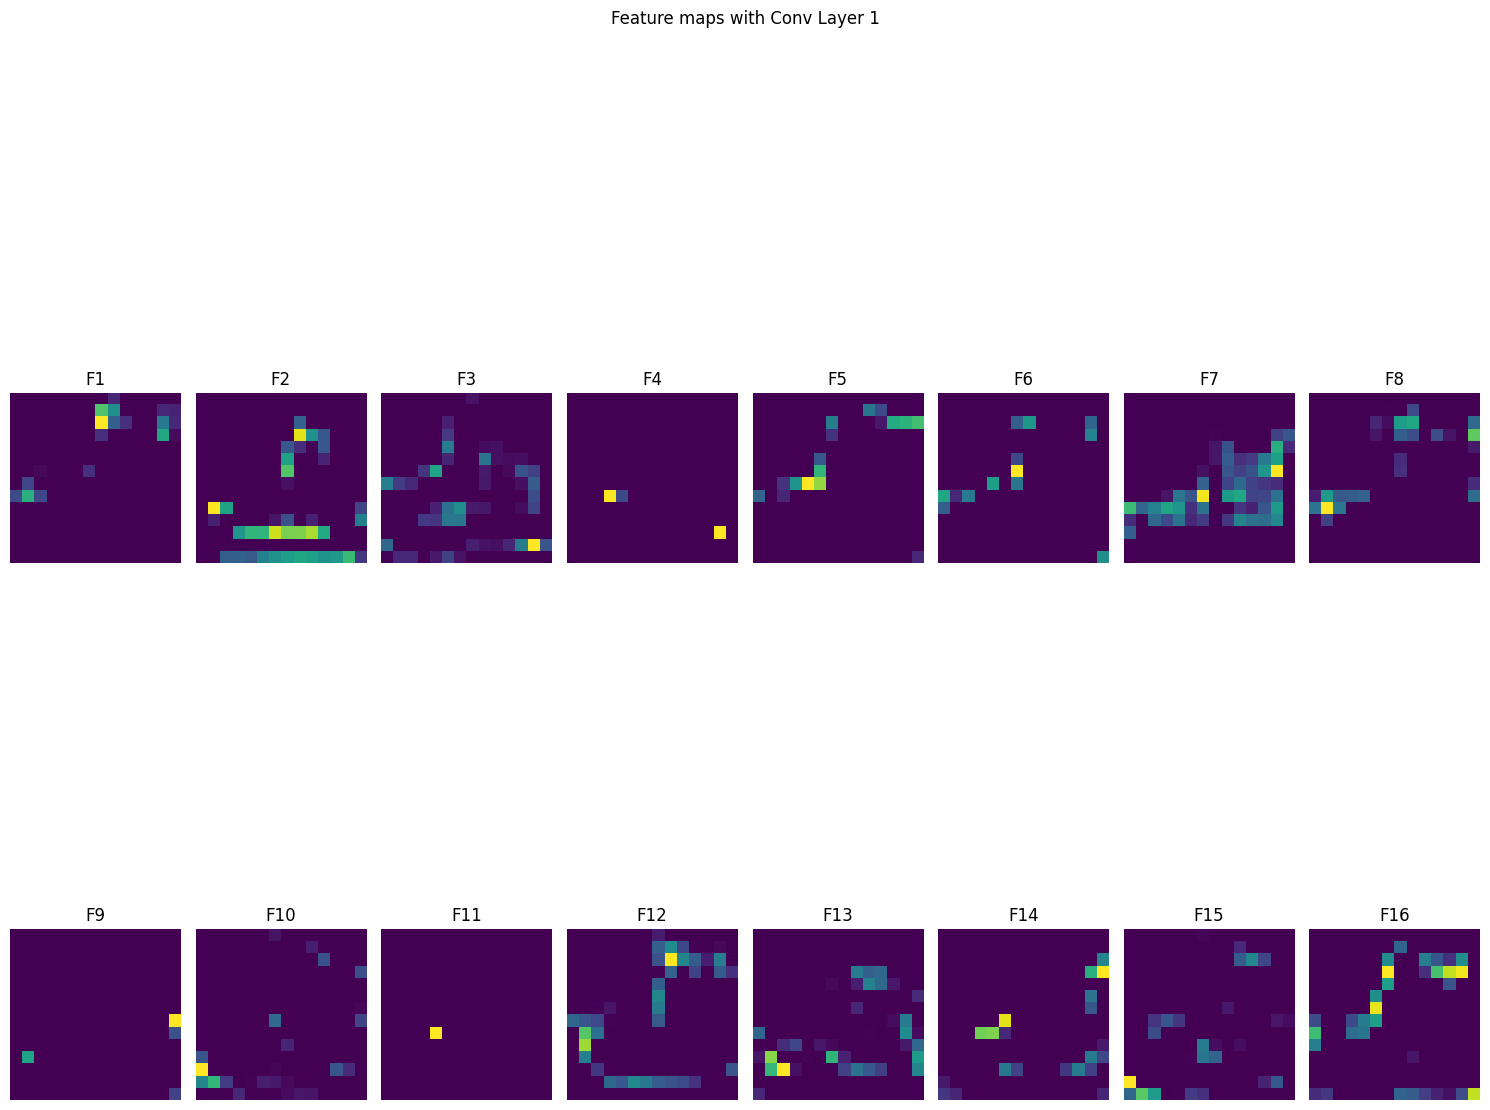

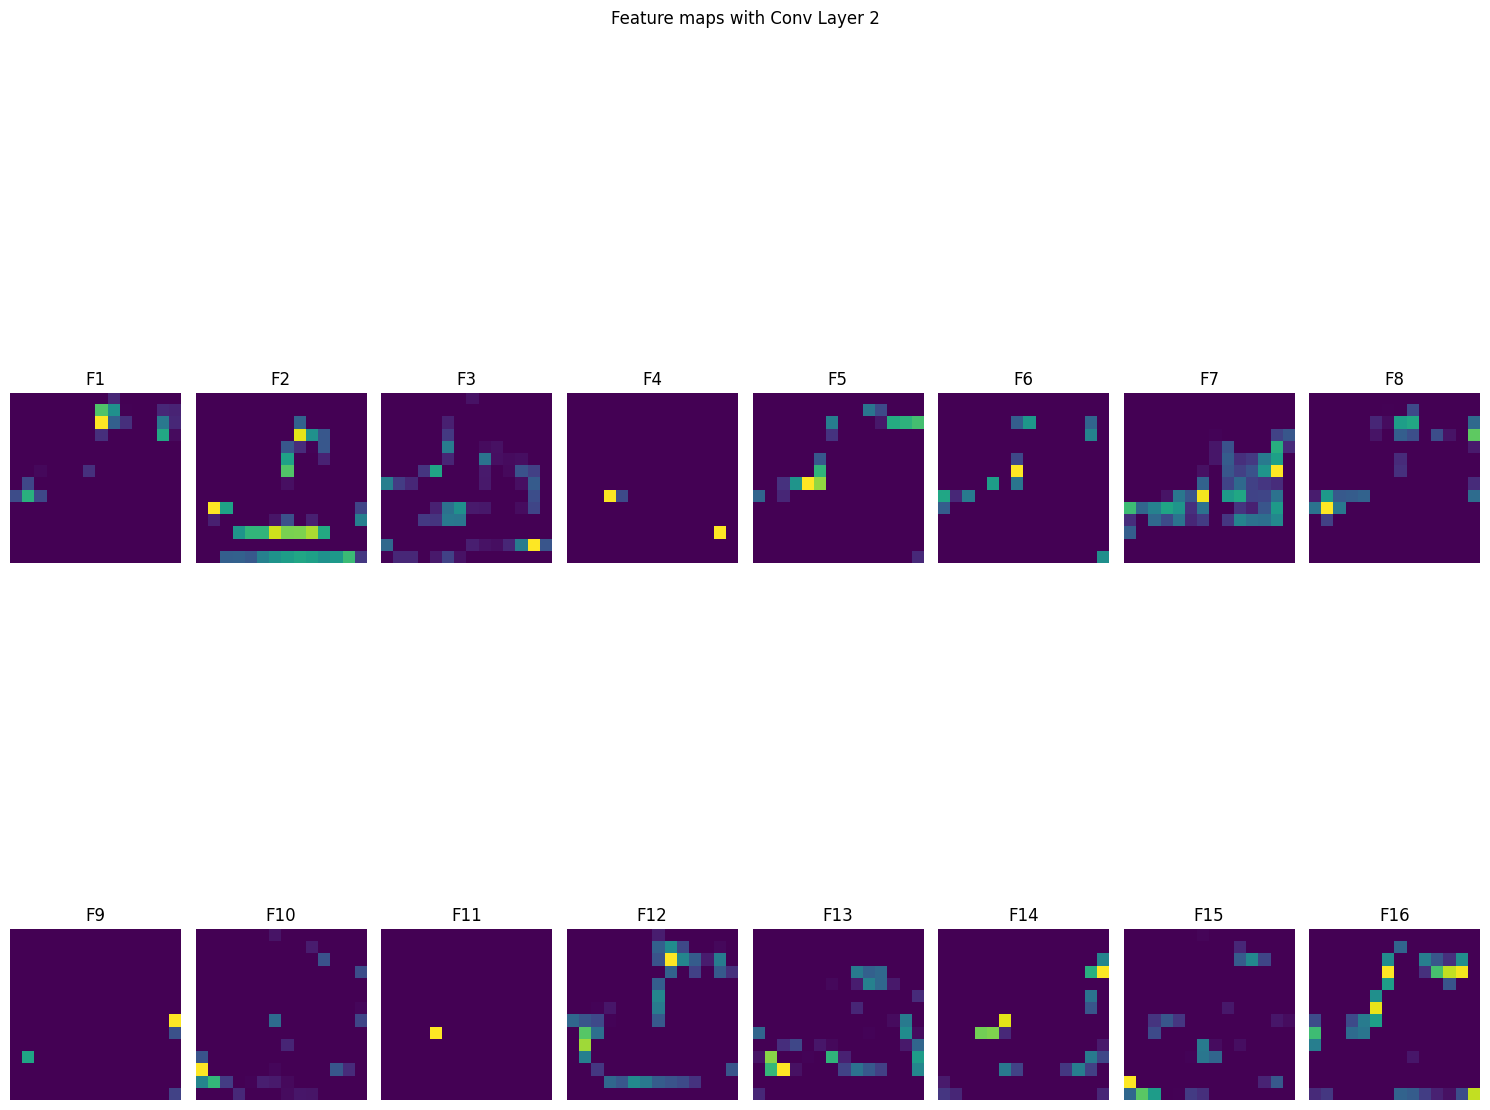

In [118]:
#입력 이미지 데이터(28*28*1)
sample_img = train_scaled[0].reshape(-1,28,28,1)

# 특성맵
ftrmaps = activ_model.predict(sample_img)

# 각 층별 시각화
for layer_i, ftrmap in enumerate(ftrmaps):
    num_filters = ftrmap.shape[-1]
    size = ftrmap.shape[1]

    
    plt.figure(figsize=(15,15))
    for i in range(min(num_filters, 16)): # 최대 16개 까지만 보기
        plt.subplot(2, 8, i+1)
        plt.imshow(ftrmap2[0,:,:,i], cmap='viridis')
        plt.axis('off')
        plt.title(f'F{i+1}')
    plt.suptitle(f'Feature maps with Conv Layer {layer_i+1}')
    plt.tight_layout()
    plt.show()

### Grad-CAM 시각화
- CNN이 입력 이미지의 어떤 영역을 기반으로 특정 클래스를 예측했는지 시각적으로 해석
- 주로 마지막 Conv2D 층의 출력(feature map)을 기반으로 작동

In [120]:
!pip install opencv-python

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/39.0 MB ? eta -:--:--
   -------------------- ------------------- 20.4/39.0 MB 107.4 MB/s eta 0:00:01
   ---------------------------------------  38.8/39.0 MB 102.8 MB/s eta 0:00:01
   ---------------------------------------- 39.0/39.0 MB 68.8 MB/s  0:00:00


In [121]:
import cv2

#### Grad-CAM 함수 정의

In [123]:
best_model.get_layer('conv1').output

<KerasTensor shape=(None, 28, 28, 32), dtype=float32, sparse=False, ragged=False, name=keras_tensor_10>

In [141]:
def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index):
    #모델의 마지막 Conv층과 출력층
    grad_model = keras.models.Model(inputs=[model.inputs],
                                   outputs=[model.get_layer(last_conv_layer_name).output, model.output])
    # 예측 인덱스 기준으로 gradient 계산
    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(predictions[0])
        class_channel = predictions[:, pred_index]

    # gradient 계산
    grads = tape.gradient(class_channel, conv_outputs)
    
    # 채널별 평균값 추출(global average pooling)
    pooled_grads = tf.reduce_mean(grads, axis=(0,1,2))
    
    # conv_layer 출력에 weight 곱하기
    conv_outputs = conv_outputs[0] # shape:(H,W,channels)
    heatmap = conv_outputs @ pooled_grads[...,tf.newaxis]
    heatmap = tf.squeeze(heatmap)
    
    # ReLU 및 정규화
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)

    return heatmap.numpy()

#### 대상 이미지 선택 및 Grad-CAM 실행

In [142]:
model_file = 'model/fmnist_best_cnn.keras'
model_cnn = keras.models.load_model(model_file)

In [143]:
# 이미지 차원을 4D 변경
img = val_X[0]
if img.ndim == 2:
    img = np.expand_dims(img, axis=-1)
img_array = np.expand_dims(img, axis=0) # (28,28,1) -> (1,28,28,1)
print(f'img_array.shape : {img_array.shape}')

# last_conv_layer_name 가져오기
last_conv_layer_name = None
for layer in reversed(model_cnn.layers):
    if isinstance(layer, keras.layers.Conv2D):
        last_conv_layer_name = layer.name
        break
print(f'last_conv_layer_name: {last_conv_layer_name}')

# Grad_CAM hearmap 실행
heatmap = make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None)

img_array.shape : (1, 28, 28, 1)
last_conv_layer_name: conv2


-----

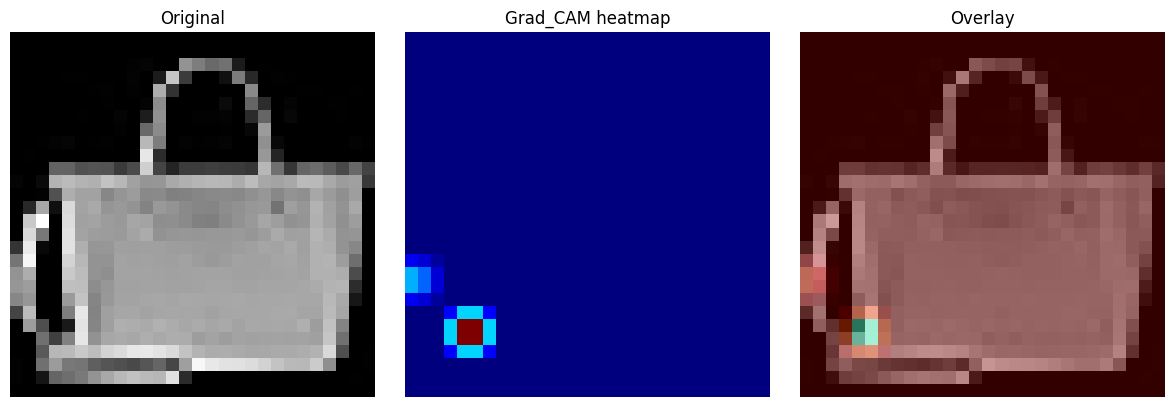

In [161]:
heatmap_resized = cv2.resize(heatmap, (28,28))
# heatmap.max().heatmap.min() : heatmap은 0과 1사이의 값이므로 0~255으로 정규화 & 컬러맵 적용
heatmap_color = cv2.applyColorMap(np.uint8(heatmap_resized*255), cv2.COLORMAP_JET)

# 원본이미지를 RGB컬러채널을 갖도록 변경 : (28,28,1) -> (28,28) -> (28,28,3)
org_img = np.squeeze(img) # (28, 28, 1) -> (28, 28)
org_img_rgb = np.uint8(np.stack([org_img]*3, axis=-1) *255)

# 원본이미지와 히트맵 이미지 오버레이
imposed_img  = cv2.addWeighted(org_img_rgb, 0.6, heatmap_color, 0.4, 0)

plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
plt.title('Original')
plt.imshow(org_img, cmap='gray')
plt.axis('off')

plt.subplot(1,3,2)
plt.title('Grad_CAM heatmap')
plt.imshow(heatmap_resized, cmap='jet')
plt.axis('off')

plt.subplot(1,3,3)
plt.title('Overlay')
plt.imshow(imposed_img)
plt.axis('off')

plt.tight_layout()
plt.show()

In [152]:
np.min(org_omg_rgb), np.max(org_omg_rgb)

(np.uint8(0), np.uint8(255))

####  Grad-CAM 실행 함수화

In [173]:
def visualize_gradCAM(model, image, last_conv_layer_name=None, pred_index=None,
                     colormap=cv2.COLORMAP_JET, figsize=(12,4)):
    #----------------------------------------------------
    # 이미지 전처리 및 마지막 conv층 이름 가져오기
    #----------------------------------------------------

    if image.ndim == 2:
        image = np.expand_dims(image, axis=-1)
    img_array = np.expand_dims(image, axis=0) # (28,28,1) -> (1, 28, 28, 1)
    
    if last_conv_layer_name is None:
        for layer in reversed(model_cnn.layers):
            if isinstance(layer, keras.layers.Conv2D):
                last_conv_layer_name = layer.name
                break
    #----------------------------------------------------
    # Grad-CAM 모델 구성 
    #----------------------------------------------------

    grad_model = keras.models.Model(
        inputs=[model.inputs],
        outputs=[model.get_layer(last_conv_layer_name).output, model.output])

    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(predictions[0])
        class_channel = predictions[:, pred_index]
    grads = tape.gradient(class_channel, conv_outputs)
    pooled_grads = tf.reduce_mean(grads, axis=(0,1,2)) #채널별로 평균을 냄(각 채널의 중요도)
    conv_outputs = conv_outputs[0] # shape:(H,W,channels)
    heatmap = conv_outputs @ pooled_grads[...,tf.newaxis] #가중합해서 2D 히트맵 생성
    heatmap = tf.squeeze(heatmap)
    heatmap = tf.maximum(heatmap,0) / tf.math.reduce_max(heatmap)
    heatmap = heatmap.numpy()

    #----------------------------------------------------
    # 시각화
    #----------------------------------------------------
    heatmap_resized = cv2.resize(heatmap, (28,28))
    heatmap_color = cv2.applyColorMap(np.uint8(heatmap_resized*255), colormap)
    org_img = np.squeeze(img) # (28,28,1) -> (28,28)
    org_img_rgb = np.uint8(np.stack([org_img]*3, axis=-1)*255)
    imposed_img = cv2.addWeighted(org_img_rgb, 0.6, heatmap_color, 0.4, 0)
    
    plt.figure(figsize=figsize #챈넓별로 평균을 냄( ㄱ각 챈널의 중욛도)
    
    plt.subplot(1,3,1)
    plt.title('Original')
    plt.imshow(org_img, cmap='gray')
    plt.axis('off')
    
    plt.subplot(1,3,2)
    plt.title('Grad-CAM heatmap')
    plt.imshow(heatmap_resized, cmap='jet')
    plt.axis('off')
    
    plt.subplot(1,3,3)
    plt.title('Overlay')
    plt.imshow(imposed_img)
    plt.axis('off')
    
    plt.tight_layout()
    plt.show()

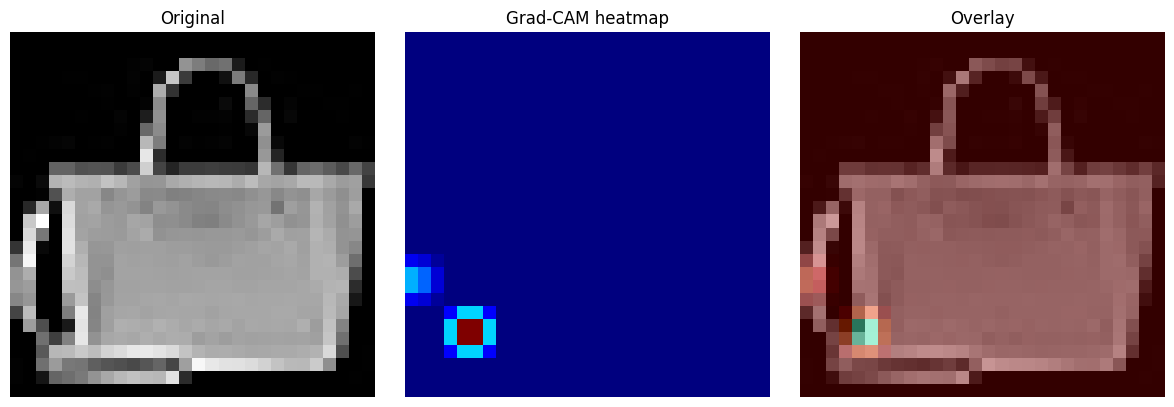

In [174]:
visualize_gradCAM(model_cnn, val_X[0])